In [1]:
# In this file, we train the classifier, and save the trained classifier and PCA params into files.
# The files will later be loaded and used in the real time emotion recognition app.
# 'pca_params.joblib' contains PCA parameters
# 'classifier.joblib' is the trained classifier

In [1]:
import csv
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from collections import Counter
import joblib

In [2]:
def pca_params(X):
    mu = np.mean(X,axis=0)
    Z = X-mu
    C = np.cov(Z,rowvar=False)
    [lam, V] = np.linalg.eigh(C)
    lam = np.flipud(lam)
    V = np.flipud(V.T)
    P = np.dot(Z,V.T)
    return mu,P,V,lam

In [3]:
def pc_cords(X, mu, V):
    z = X - mu
    p = np.dot(z, V.T)
    return p

In [4]:
def scatter_plot(P, T):
  '''
  P contains 2D vectors
  '''
  opacity=0.8
  cols=np.zeros((len(T),4))     
  cols[T=='happy']=[1,0,0,opacity] # red
  cols[T=='sad']=[0,1,0,opacity]  #green
  cols[T=='neutral']=[0,0,1,opacity] #blue
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(111, facecolor='whitesmoke')
  randomorder=np.arange(len(T))
  ax.scatter(P[randomorder,1],P[randomorder,0],s=50,linewidths=0,facecolors=cols[randomorder,:],marker="o");
  ax.set_aspect('equal')

  plt.gca().invert_yaxis()
  plt.show()

In [5]:
# Load dataset from csv file
CSV_FILE = '../scripts/features-0.csv'
allrows = np.loadtxt(CSV_FILE, delimiter=',', dtype='str')
allrows.shape

(574, 135)

In [6]:
cols = allrows.shape[1] - 1
X = allrows[:, :cols].astype('float')
T = allrows[:, cols]

In [7]:
# Split training and testing set
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.2, random_state=101)

In [8]:
# PCA parameters
mu, P, V, lam = pca_params(X_train)

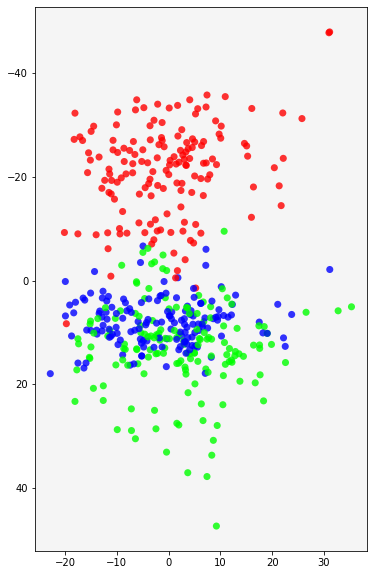

In [9]:
# Plot 2-D point clouds
P2=P[:,0:2]
V2=V[0:2,:]
scatter_plot(P2, T_train)

In [10]:
# 30 D
P30 = P[:,0:30]
V30 = V[0:30,:]

In [11]:
# Search for best parameters for SVM
# Grid Search
# Parameter Grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10]}
# Make grid search classifier
clf_grid = GridSearchCV(svm.SVC(), param_grid, verbose=1)
# Train the classifier
clf_grid.fit(P30, T_train)
# clf = grid.best_estimator_()
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Parameters:
 {'C': 10, 'gamma': 0.001}
Best Estimators:
 SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    1.2s finished


In [12]:
# Build classifier
clf = svm.SVC(kernel='rbf', C=10, gamma=0.001)
clf.fit(P30, T_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
# Train data prediction accuracy
clf.score(P30, T_train) * 100

98.69281045751634

In [14]:
# Train data confusion matix
clf_predictions_train = clf.predict(P30)
counter_train = Counter(zip(clf_predictions_train, T_train))
counter_train

Counter({('sad', 'sad'): 151,
         ('neutral', 'neutral'): 150,
         ('happy', 'happy'): 152,
         ('neutral', 'sad'): 6})

In [15]:
# Test data prediction accuracy
P30_test = pc_cords(X_test, mu, V30)
clf.score(P30_test, T_test) * 100

94.78260869565217

In [16]:
# Test data confusion matix
clf_predictions_test = clf.predict(P30_test)
counter_test = Counter(zip(clf_predictions_test, T_test))
counter_test

Counter({('happy', 'happy'): 47,
         ('sad', 'sad'): 35,
         ('neutral', 'neutral'): 27,
         ('sad', 'neutral'): 3,
         ('neutral', 'sad'): 3})

In [33]:
# SVM rdf on full dimension feature vectors
#
#
#

In [34]:
# Search for best parameters for SVM
# Grid Search
# Parameter Grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10]}
# Make grid search classifier
clf_grid = GridSearchCV(svm.SVC(), param_grid, verbose=1)
# Train the classifier
clf_grid.fit(X_train, T_train)
# clf = grid.best_estimator_()
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Parameters:
 {'C': 10, 'gamma': 0.001}
Best Estimators:
 SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    3.9s finished


In [35]:
clf = svm.SVC(kernel='rbf', C=10, gamma=0.001)
clf.fit(X_train, T_train)
clf.score(X_train, T_train) * 100

99.34640522875817

In [36]:
clf.score(X_test, T_test) * 100

93.04347826086956

In [37]:
clf_predictions_test = clf.predict(X_test)
counter_test = Counter(zip(clf_predictions_test, T_test))
counter_test

Counter({('happy', 'happy'): 46,
         ('sad', 'sad'): 34,
         ('neutral', 'neutral'): 27,
         ('sad', 'neutral'): 3,
         ('neutral', 'happy'): 1,
         ('neutral', 'sad'): 4})

In [39]:
'''
Caution: Don't run below two snippets before making sure the classifier is well trained




'''

"\nCaution: Don't run below two snippets before making sure the classifier is well trained\n\n\n\n\n"

In [40]:
# # Write classifier to file
# clf_filename = "classifier.joblib"
# joblib.dump(clf, 'classifier.joblib') 

['classifier.joblib']

In [ ]:
# # Write PCA parameters to file
# params = {
#     'mu': mu,
#     'V': V30
# }
# joblib.dump(params, 'pca_params.joblib') 